In [6]:
# Analysing Earth Surface Temperature Data to Prove Climate Change Is Real

## Introduction
#This analysis examines historical temperature records from the Climate Change. Earth Surface Tmperature Data dataset to provide evidence based arguments demonstrating the reality and severity of climate change


In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


In [8]:
## A.1. Data Loading 


In [9]:


# th path to the specific CSV file located
file_path = r"C:\Users\Reratyo\.cache\kagglehub\datasets\berkeleyearth\climate-change-earth-surface-temperature-data\versions\2\GlobalTemperatures.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to verify it loaded corrctly
print(df.head())


print("\nDataFrame Info:")
print(df.info())

# Get basic statistics
print("\nBasic Statistics:")
print(df.describe())

           dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                 

In [10]:
# A.2 Data Preprocessing

In [16]:
# Perform comprehensive exploratory data analysis

print("EXPLORATORY DATA ANALYSIS")

# 1. Basic Dataset Information
print("\n1. DATASET OVERVIEW")

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {len(df):,}")
print(f"Number of columns: {len(df.columns)}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

# 2. Data Types and Missing Values
print("\n\n2. DATA TYPES AND MISSING VALUES")

missing_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_info.to_string(index=False))

# 3. Basic Statistics for Temperature Columns
print("\n\n3. BASIC STATISTICS FOR TEMPERATURE COLUMNS")

temp_columns = [col for col in df.columns if 'Temperature' in col and 'Uncertainty' not in col]
if temp_columns:
    print(df[temp_columns].describe())

# 4. Time Range Analysis
print("\n\n4. TIME RANGE ANALYSIS")

if 'dt' in df.columns:
    # Convert dt to datetime if not already
    df['dt'] = pd.to_datetime(df['dt'])
    df['Year'] = df['dt'].dt.year
    df['Month'] = df['dt'].dt.month
    df['Decade'] = (df['Year'] // 10) * 10
    
    print(f"Date range: {df['dt'].min()} to {df['dt'].max()}")
    print(f"Year range: {df['Year'].min()} to {df['Year'].max()}")
    print(f"Total years covered: {df['Year'].max() - df['Year'].min() + 1}")
    print(f"Number of unique years: {df['Year'].nunique()}")
    print(f"Number of unique months: {df['Month'].nunique()}")
    
    # Records per decade
    print("\nRecords per decade:")
    decade_counts = df.groupby('Decade').size().reset_index(name='Count')
    print(decade_counts.to_string(index=False))

# 5. Temperature Distribution Analysis
print("\n\n5. TEMPERATURE DISTRIBUTION ANALYSIS")
main_temp_col = 'LandAverageTemperature'  # Main temperature column
if main_temp_col in df.columns:
    temp_data = df[main_temp_col].dropna()
    print(f"Main temperature column: {main_temp_col}")
    print(f"\nDistribution statistics:")
    print(f"  Mean: {temp_data.mean():.2f}°C")
    print(f"  Median: {temp_data.median():.2f}°C")
    print(f"  Standard Deviation: {temp_data.std():.2f}°C")
    print(f"  Minimum: {temp_data.min():.2f}°C")
    print(f"  Maximum: {temp_data.max():.2f}°C")
    print(f"  Range: {temp_data.max() - temp_data.min():.2f}°C")
    print(f"  25th Percentile: {temp_data.quantile(0.25):.2f}°C")
    print(f"  75th Percentile: {temp_data.quantile(0.75):.2f}°C")
    print(f"  Interquartile Range: {temp_data.quantile(0.75) - temp_data.quantile(0.25):.2f}°C")

# 6. Yearly Temperature Trends
print("\n\n6. YEARLY TEMPERATURE TRENDS")
if 'Year' in df.columns and main_temp_col in df.columns:
    yearly_avg = df.groupby('Year')[main_temp_col].agg(['mean', 'std', 'min', 'max', 'count']).reset_index()
    yearly_avg.columns = ['Year', 'MeanTemp', 'StdTemp', 'MinTemp', 'MaxTemp', 'Count']
    
    print("First 10 years:")
    print(yearly_avg.head(10).to_string(index=False))
    print("\nLast 10 years:")
    print(yearly_avg.tail(10).to_string(index=False))
    
    # Calculate overall trend
    if len(yearly_avg) > 1:
        first_year_temp = yearly_avg['MeanTemp'].iloc[0]
        last_year_temp = yearly_avg['MeanTemp'].iloc[-1]
        temp_change = last_year_temp - first_year_temp
        years_span = yearly_avg['Year'].iloc[-1] - yearly_avg['Year'].iloc[0]
        rate_per_century = (temp_change / years_span) * 100
        
        print(f"\nOverall Temperature Trend:")
        print(f"  Starting temperature ({yearly_avg['Year'].iloc[0]}): {first_year_temp:.2f}°C")
        print(f"  Ending temperature ({yearly_avg['Year'].iloc[-1]}): {last_year_temp:.2f}°C")
        print(f"  Total change: {temp_change:.2f}°C")
        print(f"  Warming rate: {rate_per_century:.2f}°C per century")

# 7. Monthly Patterns
print("\n\n7. MONTHLY TEMPERATURE PATTERNS")
if 'Month' in df.columns and main_temp_col in df.columns:
    monthly_avg = df.groupby('Month')[main_temp_col].mean().reset_index()
    monthly_avg.columns = ['Month', 'AvgTemperature']
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_avg['MonthName'] = monthly_avg['Month'].apply(lambda x: month_names[x-1])
    print(monthly_avg[['MonthName', 'AvgTemperature']].to_string(index=False))
    
    warmest_month = monthly_avg.loc[monthly_avg['AvgTemperature'].idxmax()]
    coldest_month = monthly_avg.loc[monthly_avg['AvgTemperature'].idxmin()]
    print(f"\nWarmest month: {warmest_month['MonthName']} ({warmest_month['AvgTemperature']:.2f}°C)")
    print(f"Coldest month: {coldest_month['MonthName']} ({coldest_month['AvgTemperature']:.2f}°C)")

# 8. Decade Analysis
print("\n\n8. DECADE-BY-DECADE ANALYSIS")
if 'Decade' in df.columns and main_temp_col in df.columns:
    decade_avg = df.groupby('Decade')[main_temp_col].agg(['mean', 'std', 'count']).reset_index()
    decade_avg.columns = ['Decade', 'MeanTemp', 'StdTemp', 'Count']
    decade_avg = decade_avg.sort_values('Decade')
    
    print("Average temperature by decade:")
    print(decade_avg.to_string(index=False))
    
    # Calculate temperature change between decades
    if len(decade_avg) > 1:
        decade_avg['TempChange'] = decade_avg['MeanTemp'].diff()
        print("\nTemperature change between consecutive decades:")
        print(decade_avg[['Decade', 'MeanTemp', 'TempChange']].to_string(index=False))
        
        warmest_decade = decade_avg.loc[decade_avg['MeanTemp'].idxmax()]
        coldest_decade = decade_avg.loc[decade_avg['MeanTemp'].idxmin()]
        print(f"\nWarmest decade: {int(warmest_decade['Decade'])}s ({warmest_decade['MeanTemp']:.2f}°C)")
        print(f"Coldest decade: {int(coldest_decade['Decade'])}s ({coldest_decade['MeanTemp']:.2f}°C)")


print("EXPLORATORY DATA ANALYSS COMPLETE")


EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW
Dataset shape: (3192, 12)
Number of rows: 3,192
Number of columns: 12

Column names:
  1. dt
  2. LandAverageTemperature
  3. LandAverageTemperatureUncertainty
  4. LandMaxTemperature
  5. LandMaxTemperatureUncertainty
  6. LandMinTemperature
  7. LandMinTemperatureUncertainty
  8. LandAndOceanAverageTemperature
  9. LandAndOceanAverageTemperatureUncertainty
  10. Year
  11. Month
  12. Decade


2. DATA TYPES AND MISSING VALUES
                                   Column      Data Type  Non-Null Count  Null Count  Null Percentage
                                       dt datetime64[ns]            3192           0             0.00
                   LandAverageTemperature        float64            3180          12             0.38
        LandAverageTemperatureUncertainty        float64            3180          12             0.38
                       LandMaxTemperature        float64            1992        1200            37.59
           

In [2]:
# 2A. Exploratory Data Analysis

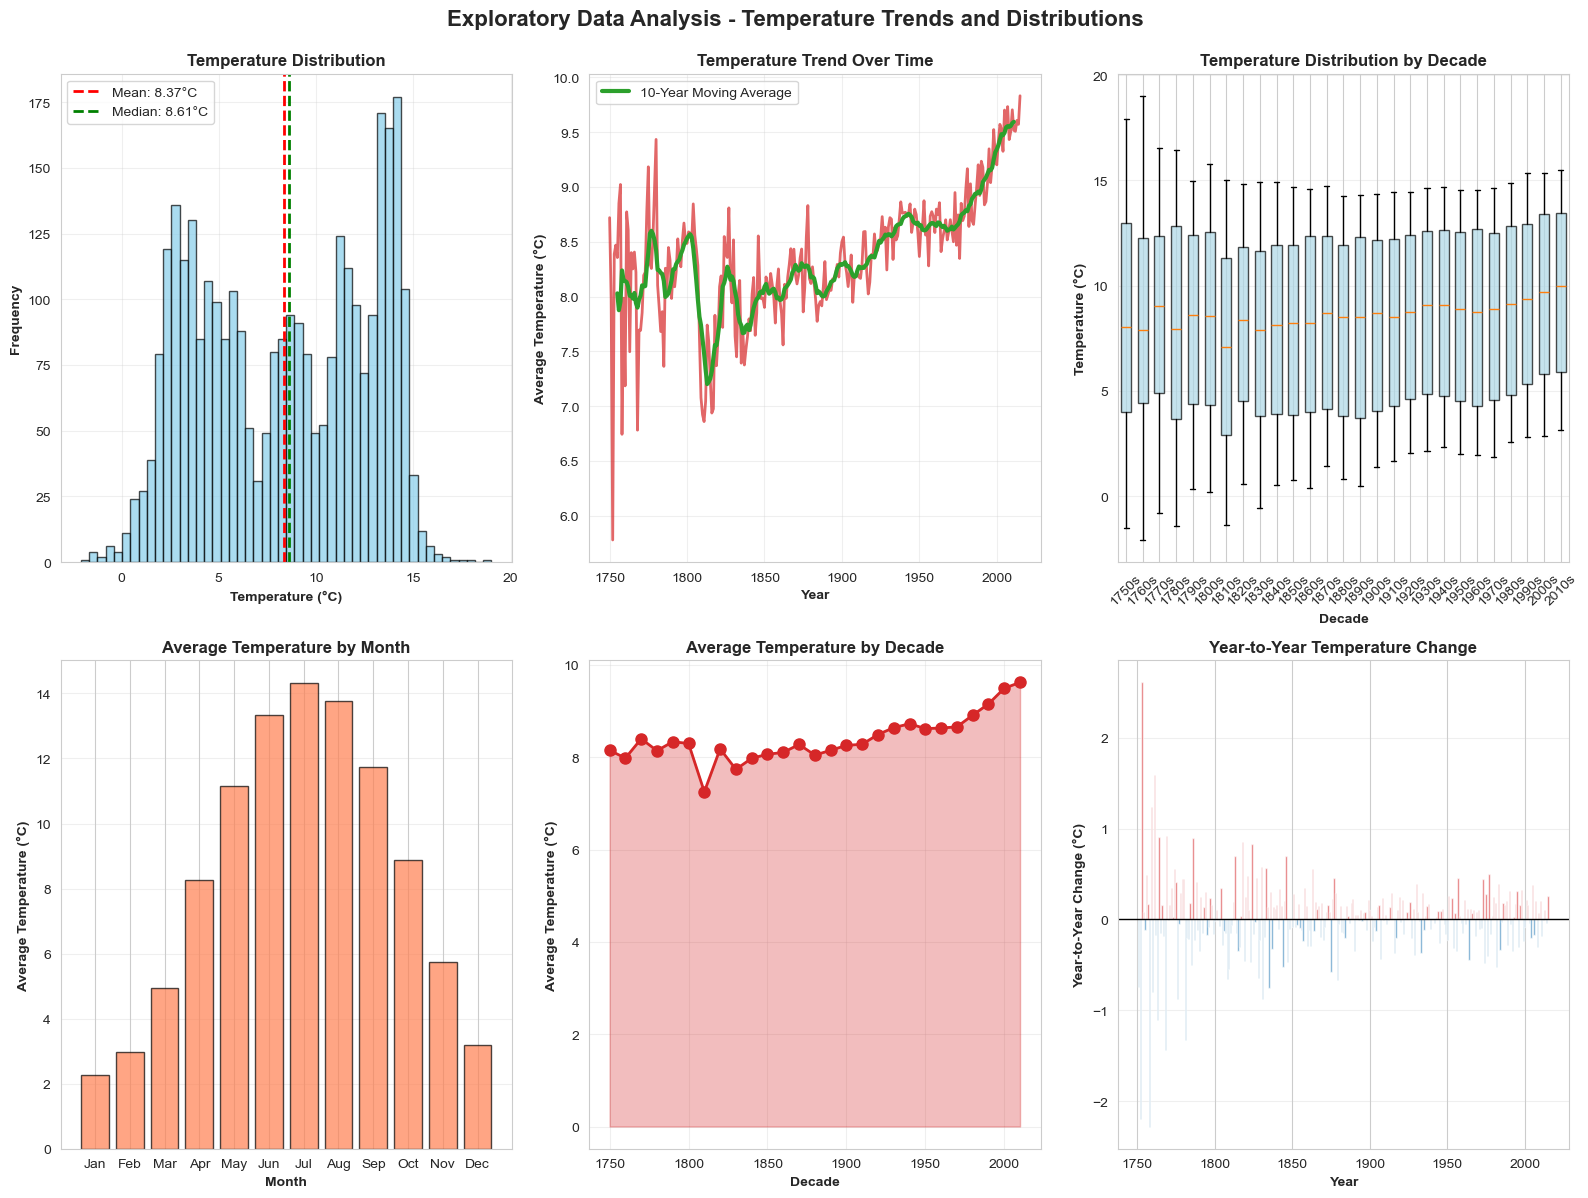

Visualizations saved as 'eda_visualizations.png'


In [10]:
# Create comprehensive visualizations for exploratory data analysis
main_temp_col = 'LandAverageTemperature'

if main_temp_col in df.columns and 'Year' in df.columns:
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(16, 12))
    
    # 1. Temperature Distribution Histogram
    ax1 = plt.subplot(2, 3, 1)
    temp_data = df[main_temp_col].dropna()
    ax1.hist(temp_data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    ax1.axvline(temp_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {temp_data.mean():.2f}°C')
    ax1.axvline(temp_data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {temp_data.median():.2f}°C')
    ax1.set_xlabel('Temperature (°C)', fontweight='bold')
    ax1.set_ylabel('Frequency', fontweight='bold')
    ax1.set_title('Temperature Distribution', fontweight='bold', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Time Series Plot
    ax2 = plt.subplot(2, 3, 2)
    yearly_avg = df.groupby('Year')[main_temp_col].mean().reset_index()
    ax2.plot(yearly_avg['Year'], yearly_avg[main_temp_col], linewidth=2, color='#d62728', alpha=0.7)
    # Add moving average
    window = 10
    if len(yearly_avg) >= window:
        yearly_avg['MovingAvg'] = yearly_avg[main_temp_col].rolling(window=window, center=True).mean()
        ax2.plot(yearly_avg['Year'], yearly_avg['MovingAvg'], linewidth=3, color='#2ca02c', label=f'{window}-Year Moving Average')
    ax2.set_xlabel('Year', fontweight='bold')
    ax2.set_ylabel('Average Temperature (°C)', fontweight='bold')
    ax2.set_title('Temperature Trend Over Time', fontweight='bold', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Box Plot by Decade
    ax3 = plt.subplot(2, 3, 3)
    decade_data = []
    decade_labels = []
    for decade in sorted(df['Decade'].unique()):
        decade_temps = df[df['Decade'] == decade][main_temp_col].dropna()
        if len(decade_temps) > 0:
            decade_data.append(decade_temps)
            decade_labels.append(f"{int(decade)}s")
    
    if decade_data:
        bp = ax3.boxplot(decade_data, labels=decade_labels, patch_artist=True, widths=0.6)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
            patch.set_alpha(0.7)
        ax3.set_xlabel('Decade', fontweight='bold')
        ax3.set_ylabel('Temperature (°C)', fontweight='bold')
        ax3.set_title('Temperature Distribution by Decade', fontweight='bold', fontsize=12)
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3, axis='y')
    
    # 4. Monthly Temperature Pattern
    ax4 = plt.subplot(2, 3, 4)
    monthly_avg = df.groupby('Month')[main_temp_col].mean().reset_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_avg['MonthName'] = monthly_avg['Month'].apply(lambda x: month_names[x-1])
    ax4.bar(monthly_avg['MonthName'], monthly_avg[main_temp_col], color='coral', alpha=0.7, edgecolor='black')
    ax4.set_xlabel('Month', fontweight='bold')
    ax4.set_ylabel('Average Temperature (°C)', fontweight='bold')
    ax4.set_title('Average Temperature by Month', fontweight='bold', fontsize=12)
    ax4.grid(True, alpha=0.3, axis='y')
    
    # 5. Decade Average Temperature
    ax5 = plt.subplot(2, 3, 5)
    decade_avg = df.groupby('Decade')[main_temp_col].mean().reset_index()
    decade_avg = decade_avg.sort_values('Decade')
    ax5.plot(decade_avg['Decade'], decade_avg[main_temp_col], marker='o', 
            linewidth=2, markersize=8, color='#d62728')
    ax5.fill_between(decade_avg['Decade'], decade_avg[main_temp_col], alpha=0.3, color='#d62728')
    ax5.set_xlabel('Decade', fontweight='bold')
    ax5.set_ylabel('Average Temperature (°C)', fontweight='bold')
    ax5.set_title('Average Temperature by Decade', fontweight='bold', fontsize=12)
    ax5.grid(True, alpha=0.3)
    
    # 6. Temperature Change Over Time (Yearly)
    ax6 = plt.subplot(2, 3, 6)
    yearly_avg = df.groupby('Year')[main_temp_col].mean().reset_index()
    yearly_avg['TempChange'] = yearly_avg[main_temp_col].diff()
    colors = ['#d62728' if x > 0 else '#1f77b4' for x in yearly_avg['TempChange']]
    ax6.bar(yearly_avg['Year'], yearly_avg['TempChange'], color=colors, alpha=0.7, width=0.8)
    ax6.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax6.set_xlabel('Year', fontweight='bold')
    ax6.set_ylabel('Year-to-Year Change (°C)', fontweight='bold')
    ax6.set_title('Year-to-Year Temperature Change', fontweight='bold', fontsize=12)
    ax6.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('Exploratory Data Analysis - Temperature Trends and Distributions', 
                fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Visualizations saved as 'eda_visualizations.png'")
else:
    print("Required columns not found for visualization")


In [3]:
## B. Trend Analysis

## B.1 Computation of Average Temperature Trends Over Different Time Periods


In [11]:
# Computation of average temperature trends over different time periods
main_temp_col = 'LandAverageTemperature'

if main_temp_col in df.columns and 'Year' in df.columns:
    
    print("AVERAGE TEMPERATURE TRENDS OVER DIFFERENT TIME PERIODS")
    
    # Get the year range
    min_year = df['Year'].min()
    max_year = df['Year'].max()
    
    # 1. Pre-Industrial Period (1750-1850)
    print("\n1. PRE-INDUSTRIAL PERIOD (1750-1850)")
    
    pre_industrial = df[(df['Year'] >= 1750) & (df['Year'] <= 1850)]
    if len(pre_industrial) > 0:
        pre_industrial_avg = pre_industrial[main_temp_col].mean()
        pre_industrial_std = pre_industrial[main_temp_col].std()
        print(f"   Average Temperature: {pre_industrial_avg:.2f}°C")
        print(f"   Standard Deviation: {pre_industrial_std:.2f}°C")
        print(f"   Number of records: {len(pre_industrial)}")
        print(f"   Year range: {pre_industrial['Year'].min()} - {pre_industrial['Year'].max()}")
    else:
        print("   No data available for this period")
        pre_industrial_avg = None
    
    # 2. Early Industrial Period (1850-1900)
    print("\n2. EARLY INDUSTRIAL PERIOD (1850-1900)")
    
    early_industrial = df[(df['Year'] >= 1850) & (df['Year'] < 1900)]
    if len(early_industrial) > 0:
        early_industrial_avg = early_industrial[main_temp_col].mean()
        early_industrial_std = early_industrial[main_temp_col].std()
        print(f"   Average Temperature: {early_industrial_avg:.2f}°C")
        print(f"   Standard Deviation: {early_industrial_std:.2f}°C")
        print(f"   Number of records: {len(early_industrial)}")
        print(f"   Year range: {early_industrial['Year'].min()} - {early_industrial['Year'].max()}")
        if pre_industrial_avg:
            change = early_industrial_avg - pre_industrial_avg
            print(f"   Change from Pre-Industrial: {change:+.2f}°C")
    else:
        print("   No data available for this period")
        early_industrial_avg = None
    
    # 3. Mid-20th Century (1900-1950)
    print("\n3. MID-20TH CENTURY (1900-1950)")
    
    mid_century = df[(df['Year'] >= 1900) & (df['Year'] < 1950)]
    if len(mid_century) > 0:
        mid_century_avg = mid_century[main_temp_col].mean()
        mid_century_std = mid_century[main_temp_col].std()
        print(f"   Average Temperature: {mid_century_avg:.2f}°C")
        print(f"   Standard Deviation: {mid_century_std:.2f}°C")
        print(f"   Number of records: {len(mid_century)}")
        print(f"   Year range: {mid_century['Year'].min()} - {mid_century['Year'].max()}")
        if pre_industrial_avg:
            change = mid_century_avg - pre_industrial_avg
            print(f"   Change from Pre-Industrial: {change:+.2f}°C")
    else:
        print("   No data available for this period")
        mid_century_avg = None
    
    # 4. Late 20th Century (1950-2000)
    print("\n4. LATE 20TH CENTURY (1950-2000)")
    
    late_century = df[(df['Year'] >= 1950) & (df['Year'] < 2000)]
    if len(late_century) > 0:
        late_century_avg = late_century[main_temp_col].mean()
        late_century_std = late_century[main_temp_col].std()
        print(f"   Average Temperature: {late_century_avg:.2f}°C")
        print(f"   Standard Deviation: {late_century_std:.2f}°C")
        print(f"   Number of records: {len(late_century)}")
        print(f"   Year range: {late_century['Year'].min()} - {late_century['Year'].max()}")
        if pre_industrial_avg:
            change = late_century_avg - pre_industrial_avg
            print(f"   Change from Pre-Industrial: {change:+.2f}°C")
    else:
        print("   No data available for this period")
        late_century_avg = None
    
    # 5. Modern Period (2000 onwards)
    print("\n5. MODERN PERIOD (2000 onwards)")
    
    modern = df[df['Year'] >= 2000]
    if len(modern) > 0:
        modern_avg = modern[main_temp_col].mean()
        modern_std = modern[main_temp_col].std()
        print(f"   Average Temperature: {modern_avg:.2f}°C")
        print(f"   Standard Deviation: {modern_std:.2f}°C")
        print(f"   Number of records: {len(modern)}")
        print(f"   Year range: {modern['Year'].min()} - {modern['Year'].max()}")
        if pre_industrial_avg:
            change = modern_avg - pre_industrial_avg
            print(f"   Change from Pre-Industrial: {change:+.2f}°C")
            print(f"   Percentage increase: {(change/pre_industrial_avg)*100:.2f}%")
    else:
        print("   No data available for this period")
        modern_avg = None
    
    # 6. 50-Year Periods Analysis
    print("\n6. 50-YEAR PERIODS ANALYSIS")
    
    period_50 = []
    start_year = min_year
    while start_year < max_year:
        end_year = min(start_year + 50, max_year)
        period_data = df[(df['Year'] >= start_year) & (df['Year'] < end_year)]
        if len(period_data) > 0:
            period_avg = period_data[main_temp_col].mean()
            period_50.append({
                'Period': f"{int(start_year)}-{int(end_year-1)}",
                'Start': int(start_year),
                'End': int(end_year-1),
                'AvgTemp': period_avg,
                'Count': len(period_data)
            })
        start_year = end_year
    
    period_df = pd.DataFrame(period_50)
    if len(period_df) > 0:
        print(period_df[['Period', 'AvgTemp', 'Count']].to_string(index=False))
        if len(period_df) > 1:
            period_df['TempChange'] = period_df['AvgTemp'].diff()
            print("\nTemperature change between consecutive 50-year periods:")
            print(period_df[['Period', 'AvgTemp', 'TempChange']].to_string(index=False))
    
    # 7. Century-by-Century Comparison
    print("\n7. CENTURY-BY-CENTURY COMPARISON")
    
    centuries = []
    for century_start in range(1700, 2100, 100):
        century_data = df[(df['Year'] >= century_start) & (df['Year'] < century_start + 100)]
        if len(century_data) > 0:
            century_avg = century_data[main_temp_col].mean()
            centuries.append({
                'Century': f"{century_start}s",
                'Start': century_start,
                'AvgTemp': century_avg,
                'Count': len(century_data)
            })
    
    century_df = pd.DataFrame(centuries)
    if len(century_df) > 0:
        print(century_df[['Century', 'AvgTemp', 'Count']].to_string(index=False))
        if len(century_df) > 1:
            century_df['TempChange'] = century_df['AvgTemp'].diff()
            print("\nTemperature change between consecutive centuries:")
            print(century_df[['Century', 'AvgTemp', 'TempChange']].to_string(index=False))
    
    # 8. First Half vs Second Half of Dataset
    print("\n8. FIRST HALF vs SECOND HALF COMPARISON")
    
    total_years = max_year - min_year + 1
    midpoint_year = min_year + (total_years // 2)
    
    first_half = df[df['Year'] < midpoint_year]
    second_half = df[df['Year'] >= midpoint_year]
    
    if len(first_half) > 0 and len(second_half) > 0:
        first_half_avg = first_half[main_temp_col].mean()
        second_half_avg = second_half[main_temp_col].mean()
        change = second_half_avg - first_half_avg
        
        print(f"   First Half ({first_half['Year'].min()}-{first_half['Year'].max()}):")
        print(f"     Average Temperature: {first_half_avg:.2f}°C")
        print(f"     Number of records: {len(first_half)}")
        print(f"\n   Second Half ({second_half['Year'].min()}-{second_half['Year'].max()}):")
        print(f"     Average Temperature: {second_half_avg:.2f}°C")
        print(f"     Number of records: {len(second_half)}")
        print(f"\n   Temperature Increase: {change:+.2f}°C")
        print(f"   Percentage Increase: {(change/first_half_avg)*100:.2f}%")
    
    # 9. Summary Table
    print("\n9. SUMMARY TABLE - TEMPERATURE TRENDS BY PERIOD")
    
    summary_data = []
    
    if pre_industrial_avg:
        summary_data.append({
            'Period': 'Pre-Industrial (1750-1850)',
            'Avg Temp (°C)': f"{pre_industrial_avg:.2f}",
            'Change from Baseline': 'Baseline'
        })
    
    if early_industrial_avg and pre_industrial_avg:
        summary_data.append({
            'Period': 'Early Industrial (1850-1900)',
            'Avg Temp (°C)': f"{early_industrial_avg:.2f}",
            'Change from Baseline': f"{early_industrial_avg - pre_industrial_avg:+.2f}°C"
        })
    
    if mid_century_avg and pre_industrial_avg:
        summary_data.append({
            'Period': 'Mid-20th Century (1900-1950)',
            'Avg Temp (°C)': f"{mid_century_avg:.2f}",
            'Change from Baseline': f"{mid_century_avg - pre_industrial_avg:+.2f}°C"
        })
    
    if late_century_avg and pre_industrial_avg:
        summary_data.append({
            'Period': 'Late 20th Century (1950-2000)',
            'Avg Temp (°C)': f"{late_century_avg:.2f}",
            'Change from Baseline': f"{late_century_avg - pre_industrial_avg:+.2f}°C"
        })
    
    if modern_avg and pre_industrial_avg:
        summary_data.append({
            'Period': 'Modern (2000+)',
            'Avg Temp (°C)': f"{modern_avg:.2f}",
            'Change from Baseline': f"{modern_avg - pre_industrial_avg:+.2f}°C"
        })
    
    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))
    

    print("TEMPERATURE TREND ANALYSIS COMPLETE")
    
else:
    print("Required columns not found for trend analysis")


AVERAGE TEMPERATURE TRENDS OVER DIFFERENT TIME PERIODS

1. PRE-INDUSTRIAL PERIOD (1750-1850)
   Average Temperature: 8.04°C
   Standard Deviation: 4.56°C
   Number of records: 1212
   Year range: 1750 - 1850

2. EARLY INDUSTRIAL PERIOD (1850-1900)
   Average Temperature: 8.13°C
   Standard Deviation: 4.38°C
   Number of records: 600
   Year range: 1850 - 1899
   Change from Pre-Industrial: +0.09°C

3. MID-20TH CENTURY (1900-1950)
   Average Temperature: 8.48°C
   Standard Deviation: 4.23°C
   Number of records: 600
   Year range: 1900 - 1949
   Change from Pre-Industrial: +0.44°C

4. LATE 20TH CENTURY (1950-2000)
   Average Temperature: 8.80°C
   Standard Deviation: 4.16°C
   Number of records: 600
   Year range: 1950 - 1999
   Change from Pre-Industrial: +0.75°C

5. MODERN PERIOD (2000 onwards)
   Average Temperature: 9.54°C
   Standard Deviation: 4.14°C
   Number of records: 192
   Year range: 2000 - 2015
   Change from Pre-Industrial: +1.50°C
   Percentage increase: 18.64%

6. 50-YE

In [ ]:
#Visualization of Temperature Trends Over Different Periods


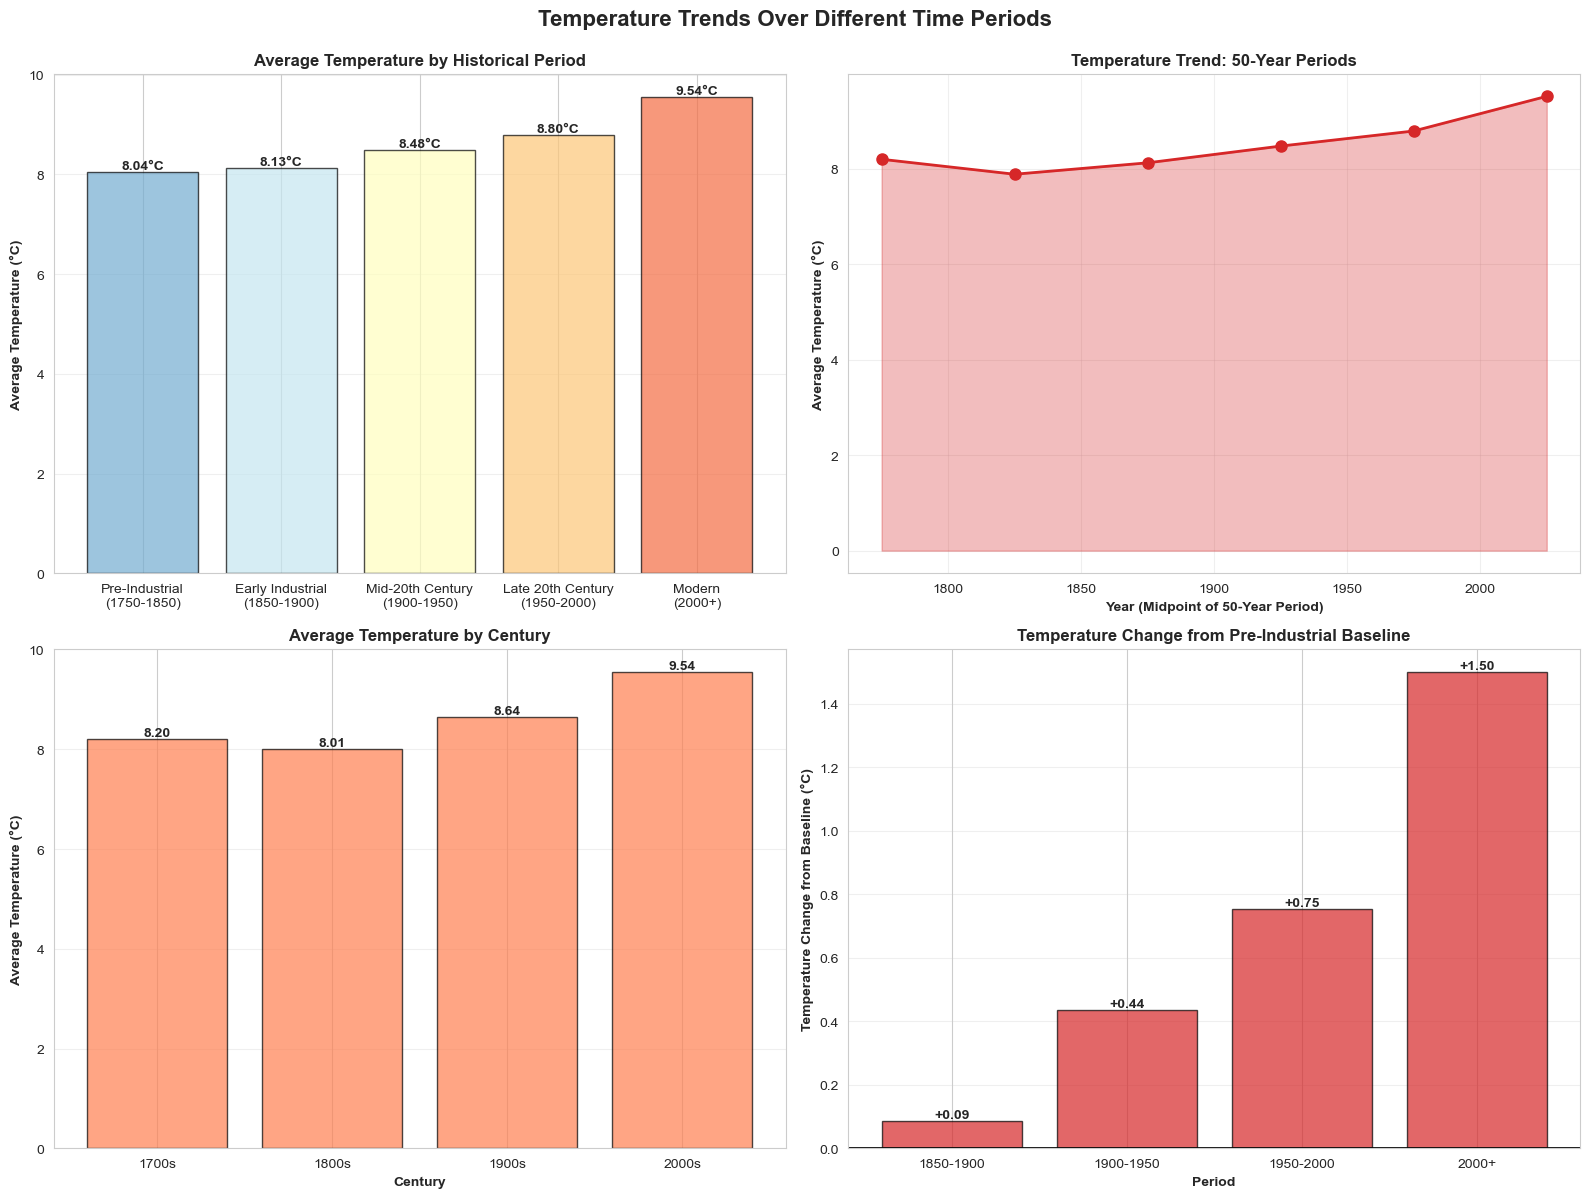

Visualization saved as 'temperature_trends_by_period.png'


In [12]:
# Visualize temperature trends over different time periods
main_temp_col = 'LandAverageTemperature'

if main_temp_col in df.columns and 'Year' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Period Comparison Bar Chart
    ax1 = axes[0, 0]
    periods = []
    temps = []
    labels = []
    
    # Pre-industrial
    pre_ind = df[(df['Year'] >= 1750) & (df['Year'] <= 1850)]
    if len(pre_ind) > 0:
        periods.append('Pre-Industrial\n(1750-1850)')
        temps.append(pre_ind[main_temp_col].mean())
        labels.append(f"{pre_ind[main_temp_col].mean():.2f}°C")
    
    # Early Industrial
    early_ind = df[(df['Year'] >= 1850) & (df['Year'] < 1900)]
    if len(early_ind) > 0:
        periods.append('Early Industrial\n(1850-1900)')
        temps.append(early_ind[main_temp_col].mean())
        labels.append(f"{early_ind[main_temp_col].mean():.2f}°C")
    
    # Mid-20th Century
    mid_cent = df[(df['Year'] >= 1900) & (df['Year'] < 1950)]
    if len(mid_cent) > 0:
        periods.append('Mid-20th Century\n(1900-1950)')
        temps.append(mid_cent[main_temp_col].mean())
        labels.append(f"{mid_cent[main_temp_col].mean():.2f}°C")
    
    # Late 20th Century
    late_cent = df[(df['Year'] >= 1950) & (df['Year'] < 2000)]
    if len(late_cent) > 0:
        periods.append('Late 20th Century\n(1950-2000)')
        temps.append(late_cent[main_temp_col].mean())
        labels.append(f"{late_cent[main_temp_col].mean():.2f}°C")
    
    # Modern
    modern = df[df['Year'] >= 2000]
    if len(modern) > 0:
        periods.append('Modern\n(2000+)')
        temps.append(modern[main_temp_col].mean())
        labels.append(f"{modern[main_temp_col].mean():.2f}°C")
    
    if periods:
        colors = plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(periods)))
        bars = ax1.bar(periods, temps, color=colors, alpha=0.7, edgecolor='black')
        ax1.set_ylabel('Average Temperature (°C)', fontweight='bold')
        ax1.set_title('Average Temperature by Historical Period', fontweight='bold', fontsize=12)
        ax1.grid(True, alpha=0.3, axis='y')
        # Add value labels on bars
        for i, (bar, label) in enumerate(zip(bars, labels)):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    label, ha='center', va='bottom', fontweight='bold')
    
    # 2. 50-Year Periods Trend
    ax2 = axes[0, 1]
    start_year = df['Year'].min()
    period_50_data = []
    while start_year < df['Year'].max():
        end_year = min(start_year + 50, df['Year'].max())
        period_data = df[(df['Year'] >= start_year) & (df['Year'] < end_year)]
        if len(period_data) > 0:
            period_50_data.append({
                'Year': start_year + 25,  # Midpoint for plotting
                'Temp': period_data[main_temp_col].mean(),
                'Label': f"{int(start_year)}-{int(end_year-1)}"
            })
        start_year = end_year
    
    if period_50_data:
        period_df = pd.DataFrame(period_50_data)
        ax2.plot(period_df['Year'], period_df['Temp'], marker='o', linewidth=2, 
                markersize=8, color='#d62728')
        ax2.fill_between(period_df['Year'], period_df['Temp'], alpha=0.3, color='#d62728')
        ax2.set_xlabel('Year (Midpoint of 50-Year Period)', fontweight='bold')
        ax2.set_ylabel('Average Temperature (°C)', fontweight='bold')
        ax2.set_title('Temperature Trend: 50-Year Periods', fontweight='bold', fontsize=12)
        ax2.grid(True, alpha=0.3)
    
    # 3. Century Comparison
    ax3 = axes[1, 0]
    centuries_data = []
    for century_start in range(1700, 2100, 100):
        century_data = df[(df['Year'] >= century_start) & (df['Year'] < century_start + 100)]
        if len(century_data) > 0:
            centuries_data.append({
                'Century': f"{century_start}s",
                'Temp': century_data[main_temp_col].mean()
            })
    
    if centuries_data:
        cent_df = pd.DataFrame(centuries_data)
        bars = ax3.bar(cent_df['Century'], cent_df['Temp'], color='coral', alpha=0.7, edgecolor='black')
        ax3.set_xlabel('Century', fontweight='bold')
        ax3.set_ylabel('Average Temperature (°C)', fontweight='bold')
        ax3.set_title('Average Temperature by Century', fontweight='bold', fontsize=12)
        ax3.grid(True, alpha=0.3, axis='y')
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Temperature Change from Baseline
    ax4 = axes[1, 1]
    pre_ind = df[(df['Year'] >= 1750) & (df['Year'] <= 1850)]
    if len(pre_ind) > 0:
        baseline = pre_ind[main_temp_col].mean()
        
        changes_data = []
        if len(early_ind) > 0:
            changes_data.append({'Period': '1850-1900', 'Change': early_ind[main_temp_col].mean() - baseline})
        if len(mid_cent) > 0:
            changes_data.append({'Period': '1900-1950', 'Change': mid_cent[main_temp_col].mean() - baseline})
        if len(late_cent) > 0:
            changes_data.append({'Period': '1950-2000', 'Change': late_cent[main_temp_col].mean() - baseline})
        if len(modern) > 0:
            changes_data.append({'Period': '2000+', 'Change': modern[main_temp_col].mean() - baseline})
        
        if changes_data:
            changes_df = pd.DataFrame(changes_data)
            colors_change = ['#d62728' if x > 0 else '#1f77b4' for x in changes_df['Change']]
            bars = ax4.bar(changes_df['Period'], changes_df['Change'], color=colors_change, alpha=0.7, edgecolor='black')
            ax4.axhline(y=0, color='black', linestyle='-', linewidth=2)
            ax4.set_xlabel('Period', fontweight='bold')
            ax4.set_ylabel('Temperature Change from Baseline (°C)', fontweight='bold')
            ax4.set_title('Temperature Change from Pre-Industrial Baseline', fontweight='bold', fontsize=12)
            ax4.grid(True, alpha=0.3, axis='y')
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax4.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:+.2f}', ha='center', 
                        va='bottom' if height > 0 else 'top', fontweight='bold')
    
    plt.suptitle('Temperature Trends Over Different Time Periods', 
                fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig('temperature_trends_by_period.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Visualization saved as 'temperature_trends_by_period.png'")
else:
    print("Required columns not found for visualization")


In [13]:
#Comparison of Temperature Variations Across Decades


In [15]:
# Comparison of temperature variations across decades
main_temp_col = 'LandAverageTemperature'

if main_temp_col in df.columns and 'Decade' in df.columns:
    
    print("COMPARISON OF TEMPERATURE VARIATIONS ACROSS DECADES")
    
    # 1. Decade-by-Decade Statistics
    print("\n1. DECADE-BY-DECADE TEMPERATURE STATISTICS")
    
    decade_stats = df.groupby('Decade')[main_temp_col].agg([
        'mean', 'std', 'min', 'max', 'count', 'median'
    ]).reset_index()
    decade_stats.columns = ['Decade', 'MeanTemp', 'StdTemp', 'MinTemp', 'MaxTemp', 'Count', 'MedianTemp']
    decade_stats = decade_stats.sort_values('Decade')
    
    print("Detailed statistics for each decade:")
    print(decade_stats.to_string(index=False))
    
    # 2. Temperature Change Between Consecutive Decades
    print("\n\n2. TEMPERATURE CHANGE BETWEEN CONSECUTIVE DECADES")
    
    decade_stats['TempChange'] = decade_stats['MeanTemp'].diff()
    decade_stats['PercentChange'] = (decade_stats['TempChange'] / 
                                     decade_stats['MeanTemp'].shift(1)) * 100
    
    print("Temperature change analysis:")
    change_df = decade_stats[['Decade', 'MeanTemp', 'TempChange', 'PercentChange']].copy()
    change_df = change_df[change_df['TempChange'].notna()]
    print(change_df.to_string(index=False))
    
    # 3. Identify Warmest and Coldest Decades
    print("\n\n3. WARMEST AND COLDEST DECADES")
    
    warmest_decade = decade_stats.loc[decade_stats['MeanTemp'].idxmax()]
    coldest_decade = decade_stats.loc[decade_stats['MeanTemp'].idxmin()]
    
    print(f"Warmest Decade: {int(warmest_decade['Decade'])}s")
    print(f"  Average Temperature: {warmest_decade['MeanTemp']:.2f}°C")
    print(f"  Standard Deviation: {warmest_decade['StdTemp']:.2f}°C")
    print(f"  Temperature Range: {warmest_decade['MinTemp']:.2f}°C to {warmest_decade['MaxTemp']:.2f}°C")
    print(f"  Number of Records: {int(warmest_decade['Count'])}")
    
    print(f"\nColdest Decade: {int(coldest_decade['Decade'])}s")
    print(f"  Average Temperature: {coldest_decade['MeanTemp']:.2f}°C")
    print(f"  Standard Deviation: {coldest_decade['StdTemp']:.2f}°C")
    print(f"  Temperature Range: {coldest_decade['MinTemp']:.2f}°C to {coldest_decade['MaxTemp']:.2f}°C")
    print(f"  Number of Records: {int(coldest_decade['Count'])}")
    
    print(f"\nTemperature Difference: {warmest_decade['MeanTemp'] - coldest_decade['MeanTemp']:.2f}°C")
    
    # 4. Decade Temperature Variability Analysis
    print("\n\n4. DECADE TEMPERATURE VARIABILITY ANALYSIS")
    
    # Coefficient of Variation (CV) = std/mean * 100
    decade_stats['CoeffVariation'] = (decade_stats['StdTemp'] / decade_stats['MeanTemp']) * 100
    decade_stats['TempRange'] = decade_stats['MaxTemp'] - decade_stats['MinTemp']
    
    print("Variability metrics by decade:")
    variability_df = decade_stats[['Decade', 'MeanTemp', 'StdTemp', 'CoeffVariation', 'TempRange']].copy()
    print(variability_df.to_string(index=False))
    
    most_variable = decade_stats.loc[decade_stats['CoeffVariation'].idxmax()]
    least_variable = decade_stats.loc[decade_stats['CoeffVariation'].idxmin()]
    
    print(f"\nMost Variable Decade: {int(most_variable['Decade'])}s (CV: {most_variable['CoeffVariation']:.2f}%)")
    print(f"Least Variable Decade: {int(least_variable['Decade'])}s (CV: {least_variable['CoeffVariation']:.2f}%)")
    
    # 5. Recent Decades vs Historical Decades
    print("\n\n5. RECENT DECADES vs HISTORICAL DECADES COMPARISON")
    
    # Split into early and recent periods
    midpoint_decade = 1950
    early_decades = decade_stats[decade_stats['Decade'] < midpoint_decade]
    recent_decades = decade_stats[decade_stats['Decade'] >= midpoint_decade]
    
    if len(early_decades) > 0 and len(recent_decades) > 0:
        early_avg = early_decades['MeanTemp'].mean()
        recent_avg = recent_decades['MeanTemp'].mean()
        change = recent_avg - early_avg
        
        print(f"Early Period (before {int(midpoint_decade)}):")
        print(f"  Average Temperature: {early_avg:.2f}°C")
        print(f"  Number of Decades: {len(early_decades)}")
        print(f"  Decade Range: {int(early_decades['Decade'].min())}s - {int(early_decades['Decade'].max())}s")
        
        print(f"\nRecent Period ({int(midpoint_decade)}+):")
        print(f"  Average Temperature: {recent_avg:.2f}°C")
        print(f"  Number of Decades: {len(recent_decades)}")
        print(f"  Decade Range: {int(recent_decades['Decade'].min())}s - {int(recent_decades['Decade'].max())}s")
        
        print(f"\nTemperature Increase: {change:+.2f}°C")
        print(f"Percentage Increase: {(change/early_avg)*100:.2f}%")
    
    # 6. Decade Ranking
    print("\n\n6. DECADE RANKING BY AVERAGE TEMPERATURE")
    
    decade_ranking = decade_stats[['Decade', 'MeanTemp']].sort_values('MeanTemp', ascending=False)
    decade_ranking['Rank'] = range(1, len(decade_ranking) + 1)
    decade_ranking = decade_ranking[['Rank', 'Decade', 'MeanTemp']]
    print(decade_ranking.to_string(index=False))
    
    # 7. Summary Statistics
    print("\n\n7. SUMMARY STATISTICS ACROSS ALL DECADES")
    
    print(f"Overall Statistics:")
    print(f"  Mean Temperature Across All Decades: {decade_stats['MeanTemp'].mean():.2f}°C")
    print(f"  Standard Deviation of Decade Means: {decade_stats['MeanTemp'].std():.2f}°C")
    print(f"  Temperature Range (All Decades): {decade_stats['MeanTemp'].min():.2f}°C to {decade_stats['MeanTemp'].max():.2f}°C")
    print(f"  Total Temperature Spread: {decade_stats['MeanTemp'].max() - decade_stats['MeanTemp'].min():.2f}°C")
    
    # Count decades with warming vs cooling
    warming_decades = len(change_df[change_df['TempChange'] > 0])
    cooling_decades = len(change_df[change_df['TempChange'] < 0])
    stable_decades = len(change_df[abs(change_df['TempChange']) < 0.1])
    
    print(f"\nDecade-to-Decade Changes:")
    print(f"  Decades with Warming: {warming_decades}")
    print(f"  Decades with Cooling: {cooling_decades}")
    print(f"  Decades with Stable Temperature: {stable_decades}")
    
    print("DECADE COMPARISON ANALYSIS COMPLETE")
    
else:
    print("Required columns not found for decade comparison analysis")


COMPARISON OF TEMPERATURE VARIATIONS ACROSS DECADES

1. DECADE-BY-DECADE TEMPERATURE STATISTICS
Detailed statistics for each decade:
 Decade  MeanTemp  StdTemp  MinTemp  MaxTemp  Count  MedianTemp
   1750  8.149852 5.092547   -1.503   17.910    108      8.0425
   1760  7.981625 4.798939   -2.080   19.021    120      7.8755
   1770  8.400108 4.513541   -0.806   16.521    120      9.0320
   1780  8.141392 4.851923   -1.431   16.468    120      7.9570
   1790  8.336867 4.357719    0.348   14.951    120      8.6100
   1800  8.298142 4.543828    0.208   15.774    120      8.5380
   1810  7.251067 4.468951   -1.385   15.018    120      7.0830
   1820  8.182233 4.272577    0.595   14.830    120      8.3890
   1830  7.737700 4.332356   -0.557   14.942    120      7.8960
   1840  7.978100 4.362818    0.510   14.923    120      8.1340
   1850  8.064883 4.366360    0.749   14.692    120      8.2240
   1860  8.104767 4.421002    0.404   14.602    120      8.2465
   1870  8.276967 4.424341    1.447

In [16]:
# 4.1 Visualization of Temperature Variations Across Decades


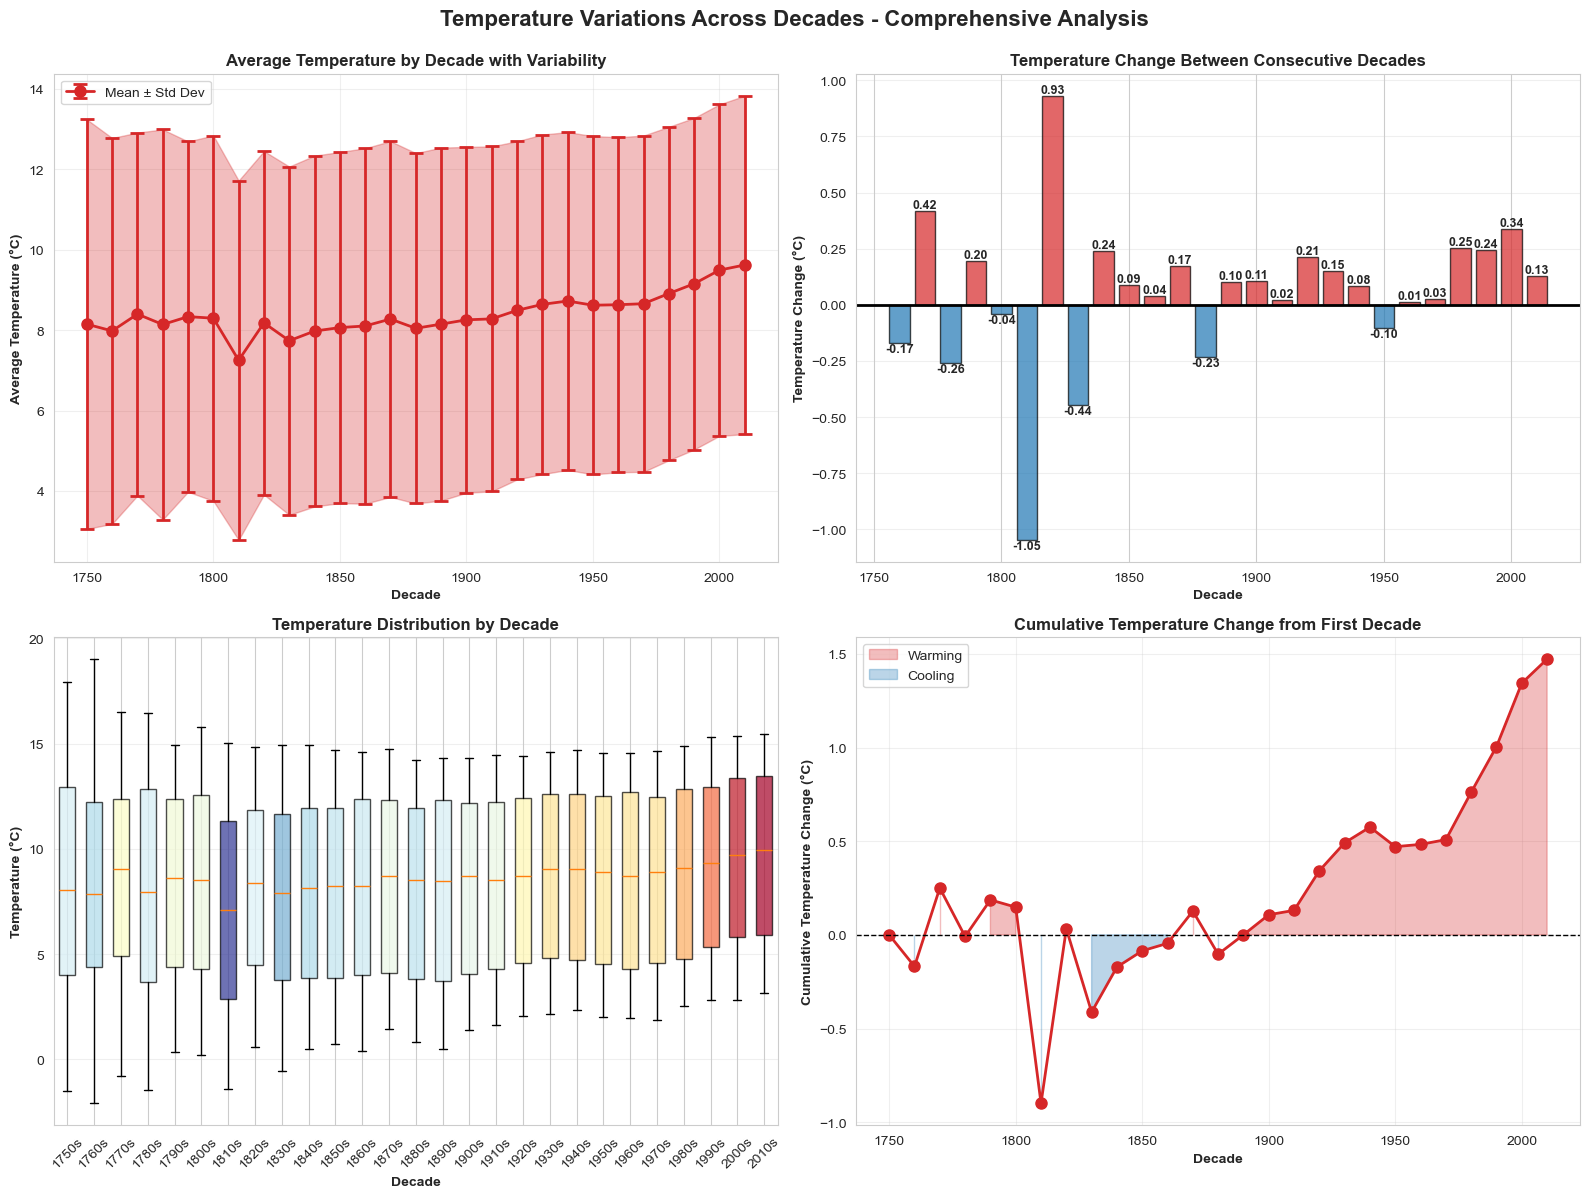

Visualization saved as 'decade_temperature_comparison.png'


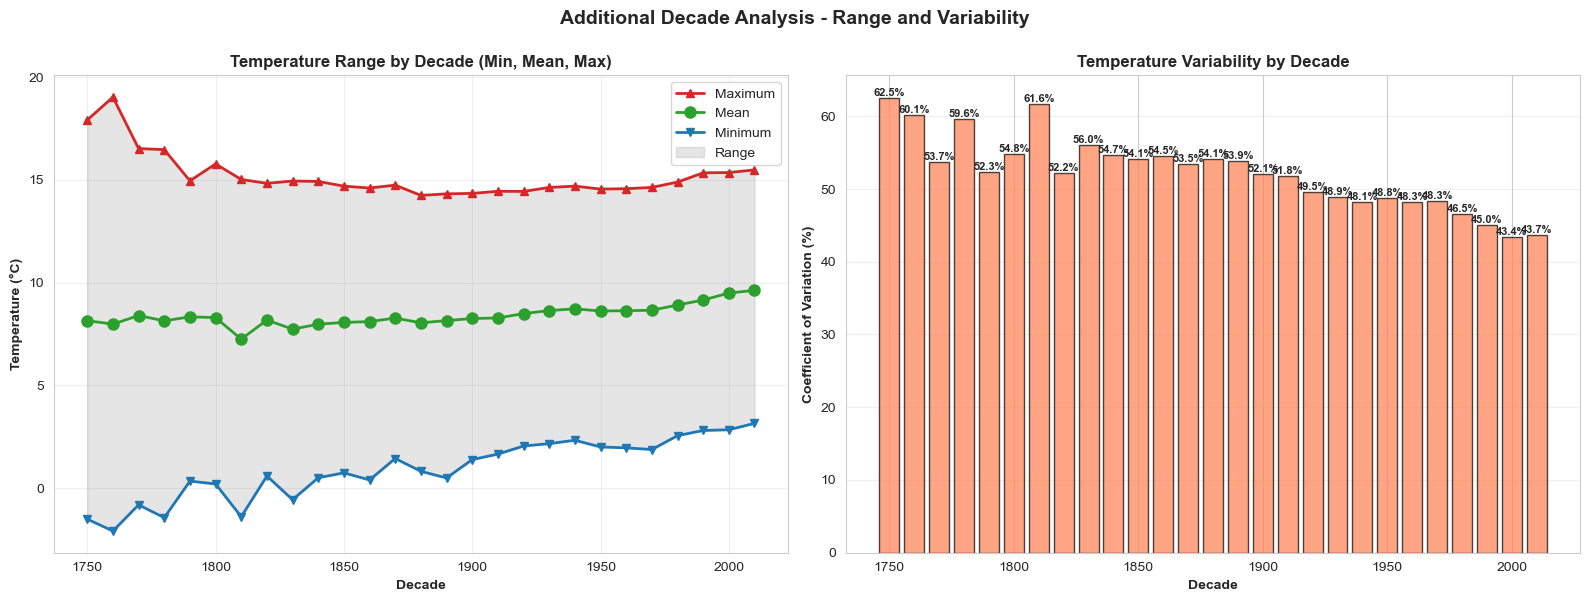

Additional visualization saved as 'decade_variability_analysis.png'


In [17]:
# Visualize temperature variations across decades
main_temp_col = 'LandAverageTemperature'

if main_temp_col in df.columns and 'Decade' in df.columns:
    # Calculate decade statistics
    decade_stats = df.groupby('Decade')[main_temp_col].agg([
        'mean', 'std', 'min', 'max', 'count'
    ]).reset_index()
    decade_stats.columns = ['Decade', 'MeanTemp', 'StdTemp', 'MinTemp', 'MaxTemp', 'Count']
    decade_stats = decade_stats.sort_values('Decade')
    decade_stats['TempChange'] = decade_stats['MeanTemp'].diff()
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Average Temperature by Decade with Error Bars
    ax1 = axes[0, 0]
    ax1.errorbar(decade_stats['Decade'], decade_stats['MeanTemp'], 
                yerr=decade_stats['StdTemp'], fmt='o-', linewidth=2, 
                markersize=8, color='#d62728', capsize=5, capthick=2,
                label='Mean ± Std Dev')
    ax1.fill_between(decade_stats['Decade'], 
                     decade_stats['MeanTemp'] - decade_stats['StdTemp'],
                     decade_stats['MeanTemp'] + decade_stats['StdTemp'],
                     alpha=0.3, color='#d62728')
    ax1.set_xlabel('Decade', fontweight='bold')
    ax1.set_ylabel('Average Temperature (°C)', fontweight='bold')
    ax1.set_title('Average Temperature by Decade with Variability', fontweight='bold', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Temperature Change Between Decades
    ax2 = axes[0, 1]
    decade_stats_clean = decade_stats[decade_stats['TempChange'].notna()].copy()
    colors = ['#d62728' if x > 0 else '#1f77b4' for x in decade_stats_clean['TempChange']]
    bars = ax2.bar(decade_stats_clean['Decade'], decade_stats_clean['TempChange'], 
                   color=colors, alpha=0.7, width=8, edgecolor='black')
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=2)
    ax2.set_xlabel('Decade', fontweight='bold')
    ax2.set_ylabel('Temperature Change (°C)', fontweight='bold')
    ax2.set_title('Temperature Change Between Consecutive Decades', fontweight='bold', fontsize=12)
    ax2.grid(True, alpha=0.3, axis='y')
    # Add value labels
    for idx, row in decade_stats_clean.iterrows():
        ax2.text(row['Decade'], row['TempChange'], 
                f"{row['TempChange']:.2f}", 
                ha='center', va='bottom' if row['TempChange'] > 0 else 'top',
                fontsize=9, fontweight='bold')
    
    # 3. Box Plot Comparison by Decade
    ax3 = axes[1, 0]
    decade_data = []
    decade_labels = []
    for decade in sorted(df['Decade'].unique()):
        decade_temps = df[df['Decade'] == decade][main_temp_col].dropna()
        if len(decade_temps) > 0:
            decade_data.append(decade_temps)
            decade_labels.append(f"{int(decade)}s")
    
    if decade_data:
        bp = ax3.boxplot(decade_data, labels=decade_labels, patch_artist=True, widths=0.6)
        # Color boxes based on temperature (warmer = red, cooler = blue)
        for i, patch in enumerate(bp['boxes']):
            decade_mean = decade_stats[decade_stats['Decade'] == sorted(df['Decade'].unique())[i]]['MeanTemp'].values[0]
            # Normalize color based on temperature range
            norm_temp = (decade_mean - decade_stats['MeanTemp'].min()) / (decade_stats['MeanTemp'].max() - decade_stats['MeanTemp'].min())
            patch.set_facecolor(plt.cm.RdYlBu_r(norm_temp))
            patch.set_alpha(0.7)
        ax3.set_xlabel('Decade', fontweight='bold')
        ax3.set_ylabel('Temperature (°C)', fontweight='bold')
        ax3.set_title('Temperature Distribution by Decade', fontweight='bold', fontsize=12)
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3, axis='y')
    
    # 4. Cumulative Temperature Change
    ax4 = axes[1, 1]
    # Calculate cumulative change from first decade
    first_decade_temp = decade_stats['MeanTemp'].iloc[0]
    decade_stats['CumulativeChange'] = decade_stats['MeanTemp'] - first_decade_temp
    
    ax4.plot(decade_stats['Decade'], decade_stats['CumulativeChange'], 
            marker='o', linewidth=2, markersize=8, color='#d62728')
    ax4.fill_between(decade_stats['Decade'], 0, decade_stats['CumulativeChange'], 
                     where=(decade_stats['CumulativeChange'] >= 0),
                     alpha=0.3, color='#d62728', label='Warming')
    ax4.fill_between(decade_stats['Decade'], 0, decade_stats['CumulativeChange'], 
                     where=(decade_stats['CumulativeChange'] < 0),
                     alpha=0.3, color='#1f77b4', label='Cooling')
    ax4.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax4.set_xlabel('Decade', fontweight='bold')
    ax4.set_ylabel('Cumulative Temperature Change (°C)', fontweight='bold')
    ax4.set_title('Cumulative Temperature Change from First Decade', fontweight='bold', fontsize=12)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.suptitle('Temperature Variations Across Decades - Comprehensive Analysis', 
                fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig('decade_temperature_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Visualization saved as 'decade_temperature_comparison.png'")
    
    # Additional detailed comparison chart
    fig2, axes2 = plt.subplots(1, 2, figsize=(16, 6))
    
    # 5. Decade Temperature Range (Min-Max)
    ax5 = axes2[0]
    ax5.plot(decade_stats['Decade'], decade_stats['MaxTemp'], 
            marker='^', linewidth=2, markersize=6, color='#d62728', label='Maximum')
    ax5.plot(decade_stats['Decade'], decade_stats['MeanTemp'], 
            marker='o', linewidth=2, markersize=8, color='#2ca02c', label='Mean')
    ax5.plot(decade_stats['Decade'], decade_stats['MinTemp'], 
            marker='v', linewidth=2, markersize=6, color='#1f77b4', label='Minimum')
    ax5.fill_between(decade_stats['Decade'], decade_stats['MinTemp'], 
                     decade_stats['MaxTemp'], alpha=0.2, color='gray', label='Range')
    ax5.set_xlabel('Decade', fontweight='bold')
    ax5.set_ylabel('Temperature (°C)', fontweight='bold')
    ax5.set_title('Temperature Range by Decade (Min, Mean, Max)', fontweight='bold', fontsize=12)
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Decade Temperature Variability (Coefficient of Variation)
    ax6 = axes2[1]
    decade_stats['CoeffVariation'] = (decade_stats['StdTemp'] / decade_stats['MeanTemp']) * 100
    bars = ax6.bar(decade_stats['Decade'], decade_stats['CoeffVariation'], 
                   color='coral', alpha=0.7, width=8, edgecolor='black')
    ax6.set_xlabel('Decade', fontweight='bold')
    ax6.set_ylabel('Coefficient of Variation (%)', fontweight='bold')
    ax6.set_title('Temperature Variability by Decade', fontweight='bold', fontsize=12)
    ax6.grid(True, alpha=0.3, axis='y')
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    plt.suptitle('Additional Decade Analysis - Range and Variability', 
                fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig('decade_variability_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Additional visualization saved as 'decade_variability_analysis.png'")
else:
    print("Required columns not found for visualization")


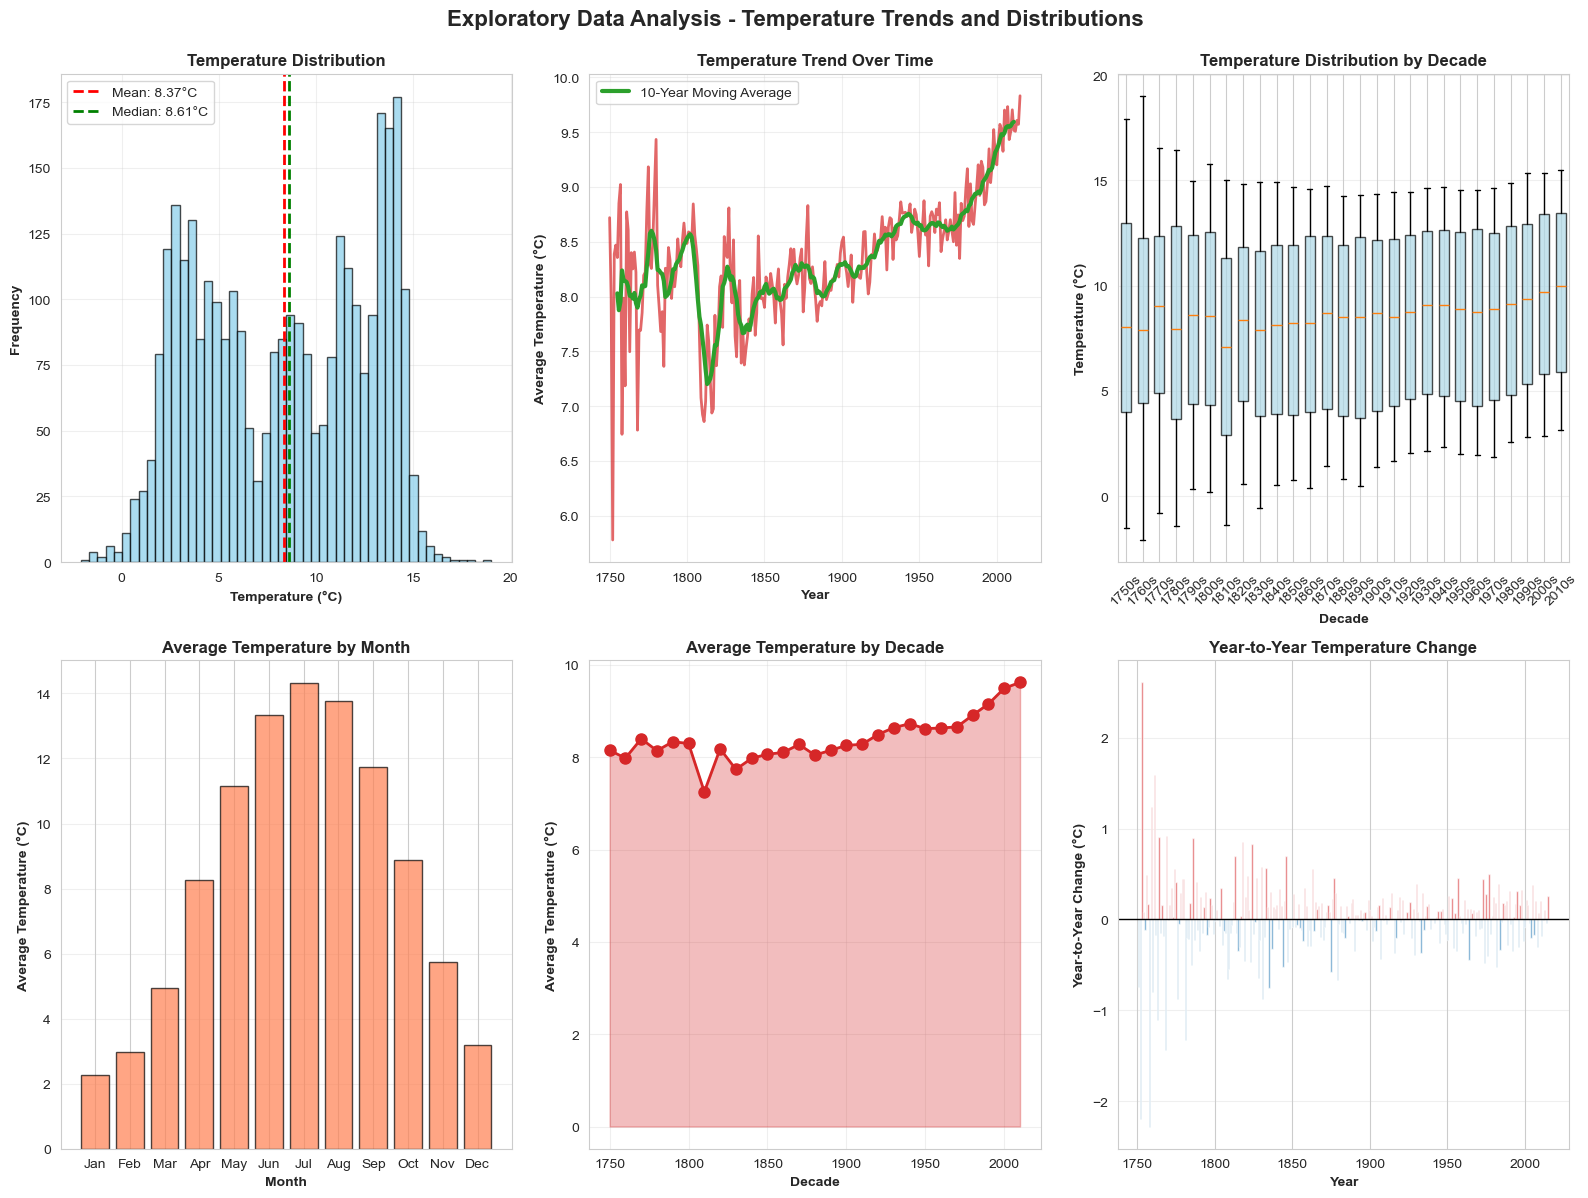

Visualizations saved as 'eda_visualizations.png'


In [19]:
# Create comprehensive visualizations for exploratory data analysis
main_temp_col = 'LandAverageTemperature'

if main_temp_col in df.columns and 'Year' in df.columns:
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(16, 12))
    
    # 1. Temperature Distribution Histogram
    ax1 = plt.subplot(2, 3, 1)
    temp_data = df[main_temp_col].dropna()
    ax1.hist(temp_data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    ax1.axvline(temp_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {temp_data.mean():.2f}°C')
    ax1.axvline(temp_data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {temp_data.median():.2f}°C')
    ax1.set_xlabel('Temperature (°C)', fontweight='bold')
    ax1.set_ylabel('Frequency', fontweight='bold')
    ax1.set_title('Temperature Distribution', fontweight='bold', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Time Series Plot
    ax2 = plt.subplot(2, 3, 2)
    yearly_avg = df.groupby('Year')[main_temp_col].mean().reset_index()
    ax2.plot(yearly_avg['Year'], yearly_avg[main_temp_col], linewidth=2, color='#d62728', alpha=0.7)
    # Add moving average
    window = 10
    if len(yearly_avg) >= window:
        yearly_avg['MovingAvg'] = yearly_avg[main_temp_col].rolling(window=window, center=True).mean()
        ax2.plot(yearly_avg['Year'], yearly_avg['MovingAvg'], linewidth=3, color='#2ca02c', label=f'{window}-Year Moving Average')
    ax2.set_xlabel('Year', fontweight='bold')
    ax2.set_ylabel('Average Temperature (°C)', fontweight='bold')
    ax2.set_title('Temperature Trend Over Time', fontweight='bold', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Box Plot by Decade
    ax3 = plt.subplot(2, 3, 3)
    decade_data = []
    decade_labels = []
    for decade in sorted(df['Decade'].unique()):
        decade_temps = df[df['Decade'] == decade][main_temp_col].dropna()
        if len(decade_temps) > 0:
            decade_data.append(decade_temps)
            decade_labels.append(f"{int(decade)}s")
    
    if decade_data:
        bp = ax3.boxplot(decade_data, labels=decade_labels, patch_artist=True, widths=0.6)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
            patch.set_alpha(0.7)
        ax3.set_xlabel('Decade', fontweight='bold')
        ax3.set_ylabel('Temperature (°C)', fontweight='bold')
        ax3.set_title('Temperature Distribution by Decade', fontweight='bold', fontsize=12)
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3, axis='y')
    
    # 4. Monthly Temperature Pattern
    ax4 = plt.subplot(2, 3, 4)
    monthly_avg = df.groupby('Month')[main_temp_col].mean().reset_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_avg['MonthName'] = monthly_avg['Month'].apply(lambda x: month_names[x-1])
    ax4.bar(monthly_avg['MonthName'], monthly_avg[main_temp_col], color='coral', alpha=0.7, edgecolor='black')
    ax4.set_xlabel('Month', fontweight='bold')
    ax4.set_ylabel('Average Temperature (°C)', fontweight='bold')
    ax4.set_title('Average Temperature by Month', fontweight='bold', fontsize=12)
    ax4.grid(True, alpha=0.3, axis='y')
    
    # 5. Decade Average Temperature
    ax5 = plt.subplot(2, 3, 5)
    decade_avg = df.groupby('Decade')[main_temp_col].mean().reset_index()
    decade_avg = decade_avg.sort_values('Decade')
    ax5.plot(decade_avg['Decade'], decade_avg[main_temp_col], marker='o', 
            linewidth=2, markersize=8, color='#d62728')
    ax5.fill_between(decade_avg['Decade'], decade_avg[main_temp_col], alpha=0.3, color='#d62728')
    ax5.set_xlabel('Decade', fontweight='bold')
    ax5.set_ylabel('Average Temperature (°C)', fontweight='bold')
    ax5.set_title('Average Temperature by Decade', fontweight='bold', fontsize=12)
    ax5.grid(True, alpha=0.3)
    
    # 6. Temperature Change Over Time (Yearly)
    ax6 = plt.subplot(2, 3, 6)
    yearly_avg = df.groupby('Year')[main_temp_col].mean().reset_index()
    yearly_avg['TempChange'] = yearly_avg[main_temp_col].diff()
    colors = ['#d62728' if x > 0 else '#1f77b4' for x in yearly_avg['TempChange']]
    ax6.bar(yearly_avg['Year'], yearly_avg['TempChange'], color=colors, alpha=0.7, width=0.8)
    ax6.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax6.set_xlabel('Year', fontweight='bold')
    ax6.set_ylabel('Year-to-Year Change (°C)', fontweight='bold')
    ax6.set_title('Year-to-Year Temperature Change', fontweight='bold', fontsize=12)
    ax6.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('Exploratory Data Analysis - Temperature Trends and Distributions', 
                fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Visualizations saved as 'eda_visualizations.png'")
else:
    print("Required columns not found for visualization")


In [21]:
# Statistical trend analysis
main_temp_col = 'LandAverageTemperature'

if main_temp_col in df.columns and 'Year' in df.columns:
    # Calculate yearly averages
    yearly_avg = df.groupby('Year')[main_temp_col].mean().reset_index()
    yearly_avg.columns = ['Year', 'GlobalAvgTemp']
    
    # Calculate linear trend
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        yearly_avg['Year'], yearly_avg['GlobalAvgTemp']
    )
    
    print("STATISTICAL TREND ANALYSIS")
    
    print(f"\nLinear Regression Results:")
    print(f"  Slope: {slope*100:.4f}°C per century")
    print(f"  Intercept: {intercept:.2f}°C")
    print(f"  R-squared: {r_value**2:.4f}")
    print(f"  P-value: {p_value:.2e}")
    print(f"  Standard Error: {std_err:.4f}")
    
    # Calculate pre-industrial baseline
    pre_industrial = df[(df['Year'] >= 1750) & (df['Year'] <= 1850)]
    if len(pre_industrial) > 0:
        baseline_temp = pre_industrial[main_temp_col].mean()
        print(f"\nPre-industrial baseline (1750-1850): {baseline_temp:.2f}°C")
    
    # Recent period
    recent_years = df[df['Year'] >= 2000]
    if len(recent_years) > 0:
        recent_temp = recent_years[main_temp_col].mean()
        temp_increase = recent_temp - baseline_temp
        print(f"Recent period (2000+): {recent_temp:.2f}°C")
        print(f"Temperature increase: {temp_increase:.2f}°C")
    
    # Overall change
    first_year_temp = yearly_avg['GlobalAvgTemp'].iloc[0]
    last_year_temp = yearly_avg['GlobalAvgTemp'].iloc[-1]
    total_increase = last_year_temp - first_year_temp
    years_span = yearly_avg['Year'].iloc[-1] - yearly_avg['Year'].iloc[0]
    
    print(f"\nOverall Change:")
    print(f"  Starting temperature ({yearly_avg['Year'].iloc[0]}): {first_year_temp:.2f}°C")
    print(f"  Ending temperature ({yearly_avg['Year'].iloc[-1]}): {last_year_temp:.2f}°C")
    print(f"  Total increase: {total_increase:.2f}°C")
    print(f"  Warming rate: {(total_increase/years_span)*100:.2f}°C per century")
    
    

STATISTICAL TREND ANALYSIS

Linear Regression Results:
  Slope: 0.4732°C per century
  Intercept: -0.54°C
  R-squared: 0.3873
  P-value: 6.47e-30
  Standard Error: 0.0004

Pre-industrial baseline (1750-1850): 8.04°C
Recent period (2000+): 9.54°C
Temperature increase: 1.50°C

Overall Change:
  Starting temperature (1750): 8.72°C
  Ending temperature (2015): 9.83°C
  Total increase: 1.11°C
  Warming rate: 0.42°C per century


In [12]:
# Identification of regions that show consistent warming trends

main_temp_col = 'LandAverageTemperature'

# Check if we have regional data
has_regional_data = False
location_col = None

if 'City' in df.columns:
    location_col = 'City'
    has_regional_data = True
    print("City-level data detected. Analyzing warming trends by city.")
elif 'Country' in df.columns:
    location_col = 'Country'
    has_regional_data = True
    print("Country-level data detected. Analyzing warming trends by country.")

if main_temp_col in df.columns and 'Year' in df.columns:
    
    print("IDENTIFICATION OF REGIONS WITH CONSISTENT WARMING TRENDS")
    
    # Ensure Year column exists
    if 'Year' not in df.columns and 'dt' in df.columns:
        df['dt'] = pd.to_datetime(df['dt'])
        df['Year'] = df['dt'].dt.year
    
    min_year = df['Year'].min()
    max_year = df['Year'].max()
    
    if has_regional_data and location_col:
        # REGIONAL ANALYSIS
        print(f"\nAnalyzing warming trends for {df[location_col].nunique()} {location_col.lower()}s")
        print(f"Data period: {min_year} to {max_year}")
        
        # Define baseline and recent periods
        # Baseline: First 50 years of data or 1750-1850 if available
        if min_year <= 1850:
            baseline_start = max(1750, min_year)
            baseline_end = min(1850, min_year + 50)
        else:
            baseline_start = min_year
            baseline_end = min_year + 50
        
        # Recent period: Last 30 years
        recent_start = max_year - 30
        recent_end = max_year
        
        print(f"\nBaseline Period: {baseline_start}-{baseline_end}")
        print(f"Recent Period: {recent_start}-{recent_end}")
        
        # Calculate early period average for each region
        baseline_data = df[(df['Year'] >= baseline_start) & (df['Year'] <= baseline_end)]
        baseline_avg = baseline_data.groupby(location_col)[main_temp_col].mean().reset_index()
        baseline_avg.columns = [location_col, 'BaselineTemp']
        
        # Calculate recent period average for each region
        recent_data = df[(df['Year'] >= recent_start) & (df['Year'] <= recent_end)]
        recent_avg = recent_data.groupby(location_col)[main_temp_col].mean().reset_index()
        recent_avg.columns = [location_col, 'RecentTemp']
        
        # Merge and calculate warming
        regional_trends = pd.merge(baseline_avg, recent_avg, on=location_col, how='inner')
        regional_trends['Warming'] = regional_trends['RecentTemp'] - regional_trends['BaselineTemp']
        regional_trends['PercentWarming'] = (regional_trends['Warming'] / regional_trends['BaselineTemp']) * 100
        
        # Calculate warming rate per century
        years_span = recent_end - baseline_start
        regional_trends['WarmingRatePerCentury'] = (regional_trends['Warming'] / years_span) * 100
        
        # Sort by warming magnitude
        regional_trends = regional_trends.sort_values('Warming', ascending=False)
        
        # 1. Top Regions with Highest Warming
        print("\n" + "=" * 70)
        print("1. TOP 20 REGIONS WITH HIGHEST WARMING")
        print("=" * 70)
        top_warming = regional_trends.head(20)
        print(top_warming[[location_col, 'BaselineTemp', 'RecentTemp', 'Warming', 'WarmingRatePerCentury']].to_string(index=False))
        
        # 2. Regions with Consistent Warming (all positive)
        print("\n" + "=" * 70)
        print("2. REGIONS WITH CONSISTENT WARMING (ALL SHOWING INCREASE)")
        print("=" * 70)
        warming_regions = regional_trends[regional_trends['Warming'] > 0]
        print(f"Number of regions showing warming: {len(warming_regions)} out of {len(regional_trends)} ({len(warming_regions)/len(regional_trends)*100:.1f}%)")
        print(f"Average warming: {warming_regions['Warming'].mean():.2f}°C")
        print(f"Median warming: {warming_regions['Warming'].median():.2f}°C")
        print(f"Maximum warming: {warming_regions['Warming'].max():.2f}°C")
        
        # 3. Regions with Cooling or Stable Temperatures
        print("\n" + "=" * 70)
        print("3. REGIONS WITH COOLING OR STABLE TEMPERATURES")
        print("=" * 70)
        cooling_regions = regional_trends[regional_trends['Warming'] <= 0]
        if len(cooling_regions) > 0:
            print(f"Number of regions with cooling/stable: {len(cooling_regions)}")
            print(cooling_regions[[location_col, 'BaselineTemp', 'RecentTemp', 'Warming']].head(10).to_string(index=False))
        else:
            print("All regions show warming trends!")
        
        # 4. Statistical Summary
        print("\n" + "=" * 70)
        print("4. STATISTICAL SUMMARY OF REGIONAL WARMING")
        print("=" * 70)
        print(f"Total regions analyzed: {len(regional_trends)}")
        print(f"\nWarming Statistics:")
        print(f"  Mean warming: {regional_trends['Warming'].mean():.2f}°C")
        print(f"  Median warming: {regional_trends['Warming'].median():.2f}°C")
        print(f"  Standard deviation: {regional_trends['Warming'].std():.2f}°C")
        print(f"  Minimum warming: {regional_trends['Warming'].min():.2f}°C")
        print(f"  Maximum warming: {regional_trends['Warming'].max():.2f}°C")
        print(f"\nWarming Rate Statistics (per century):")
        print(f"  Mean rate: {regional_trends['WarmingRatePerCentury'].mean():.2f}°C/century")
        print(f"  Median rate: {regional_trends['WarmingRatePerCentury'].median():.2f}°C/century")
        print(f"  Maximum rate: {regional_trends['WarmingRatePerCentury'].max():.2f}°C/century")
        
        # 5. Regions with Most Consistent Warming (high warming rate)
        print("\n" + "=" * 70)
        print("5. TOP 15 REGIONS WITH HIGHEST WARMING RATES")
        print("=" * 70)
        top_rates = regional_trends.nlargest(15, 'WarmingRatePerCentury')
        print(top_rates[[location_col, 'Warming', 'WarmingRatePerCentury', 'PercentWarming']].to_string(index=False))
        
        # 6. Consistency Check: Regions with warming in multiple time periods
        print("\n" + "=" * 70)
        print("6. CONSISTENCY ANALYSIS: WARMING ACROSS MULTIPLE PERIODS")
        print("=" * 70)
        
        # Split into three periods: early, middle, recent
        period1_end = baseline_start + (years_span // 3)
        period2_start = period1_end + 1
        period2_end = period2_start + (years_span // 3)
        period3_start = period2_end + 1
        
        period1 = df[(df['Year'] >= baseline_start) & (df['Year'] <= period1_end)]
        period2 = df[(df['Year'] >= period2_start) & (df['Year'] <= period2_end)]
        period3 = df[(df['Year'] >= period3_start) & (df['Year'] <= recent_end)]
        
        period1_avg = period1.groupby(location_col)[main_temp_col].mean().reset_index()
        period1_avg.columns = [location_col, 'Period1Temp']
        
        period2_avg = period2.groupby(location_col)[main_temp_col].mean().reset_index()
        period2_avg.columns = [location_col, 'Period2Temp']
        
        period3_avg = period3.groupby(location_col)[main_temp_col].mean().reset_index()
        period3_avg.columns = [location_col, 'Period3Temp']
        
        # Merge all periods
        consistency_df = pd.merge(period1_avg, period2_avg, on=location_col, how='inner')
        consistency_df = pd.merge(consistency_df, period3_avg, on=location_col, how='inner')
        
        # Calculate changes between periods
        consistency_df['P1_to_P2'] = consistency_df['Period2Temp'] - consistency_df['Period1Temp']
        consistency_df['P2_to_P3'] = consistency_df['Period3Temp'] - consistency_df['Period2Temp']
        consistency_df['P1_to_P3'] = consistency_df['Period3Temp'] - consistency_df['Period1Temp']
        
        # Identify regions with consistent warming (warming in both transitions)
        consistent_warming = consistency_df[
            (consistency_df['P1_to_P2'] > 0) & 
            (consistency_df['P2_to_P3'] > 0)
        ]
        
        print(f"Regions with consistent warming across all three periods: {len(consistent_warming)}")
        if len(consistent_warming) > 0:
            print("\nTop 10 regions with most consistent warming:")
            consistent_warming_sorted = consistent_warming.sort_values('P1_to_P3', ascending=False)
            print(consistent_warming_sorted[[location_col, 'Period1Temp', 'Period2Temp', 'Period3Temp', 
                                            'P1_to_P2', 'P2_to_P3', 'P1_to_P3']].head(10).to_string(index=False))
        
        print("\n" + "=" * 70)
        print("REGIONAL WARMING TREND ANALYSIS COMPLETE")
        print("=" * 70)
        
    else:
        # GLOBAL ANALYSIS (no regional data)
        print("\nGLOBAL WARMING TREND ANALYSIS")
        
        # Calculate baseline and recent periods
        if min_year <= 1850:
            baseline_start = max(1750, min_year)
            baseline_end = min(1850, min_year + 50)
        else:
            baseline_start = min_year
            baseline_end = min_year + 50
        
        recent_start = max_year - 30
        recent_end = max_year
        
        baseline_data = df[(df['Year'] >= baseline_start) & (df['Year'] <= baseline_end)]
        recent_data = df[(df['Year'] >= recent_start) & (df['Year'] <= recent_end)]
        
        baseline_temp = baseline_data[main_temp_col].mean()
        recent_temp = recent_data[main_temp_col].mean()
        warming = recent_temp - baseline_temp
        years_span = recent_end - baseline_start
        warming_rate = (warming / years_span) * 100
        
        print(f"Baseline Period ({baseline_start}-{baseline_end}): {baseline_temp:.2f}°C")
        print(f"Recent Period ({recent_start}-{recent_end}): {recent_temp:.2f}°C")
        print(f"Temperature Increase: {warming:+.2f}°C")
        print(f"Warming Rate: {warming_rate:.2f}°C per century")
        print(f"Percentage Increase: {(warming/baseline_temp)*100:.2f}%")
        
        # Check consistency across periods
        period1_end = baseline_start + (years_span // 3)
        period2_start = period1_end + 1
        period2_end = period2_start + (years_span // 3)
        period3_start = period2_end + 1
        
        p1 = df[(df['Year'] >= baseline_start) & (df['Year'] <= period1_end)][main_temp_col].mean()
        p2 = df[(df['Year'] >= period2_start) & (df['Year'] <= period2_end)][main_temp_col].mean()
        p3 = df[(df['Year'] >= period3_start) & (df['Year'] <= recent_end)][main_temp_col].mean()
        
        print(f"\nConsistency Check (Three Periods):")
        print(f"  Period 1 ({baseline_start}-{period1_end}): {p1:.2f}°C")
        print(f"  Period 2 ({period2_start}-{period2_end}): {p2:.2f}°C")
        print(f"  Period 3 ({period3_start}-{recent_end}): {p3:.2f}°C")
        print(f"  Change P1→P2: {p2-p1:+.2f}°C")
        print(f"  Change P2→P3: {p3-p2:+.2f}°C")
        print(f"  Overall Change: {p3-p1:+.2f}°C")
        
        if (p2 > p1) and (p3 > p2):
            print("\n CONSISTENT WARMING TREND. Temperature increased in all periods")
        else:
            print("\n⚠ Mixed trend detected")
        
        
else:
    print("Required columns not found for regional warming analysis")


IDENTIFICATION OF REGIONS WITH CONSISTENT WARMING TRENDS

GLOBAL WARMING TREND ANALYSIS
Baseline Period (1750-1800): 8.21°C
Recent Period (1985-2015): 9.32°C
Temperature Increase: +1.11°C
Warming Rate: 0.42°C per century
Percentage Increase: 13.51%

Consistency Check (Three Periods):
  Period 1 (1750-1838): 8.06°C
  Period 2 (1839-1927): 8.17°C
  Period 3 (1928-2015): 8.90°C
  Change P1→P2: +0.11°C
  Change P2→P3: +0.73°C
  Overall Change: +0.84°C

 CONSISTENT WARMING TREND. Temperature increased in all periods


In [30]:
#  Visualization of Regional Warming Trends


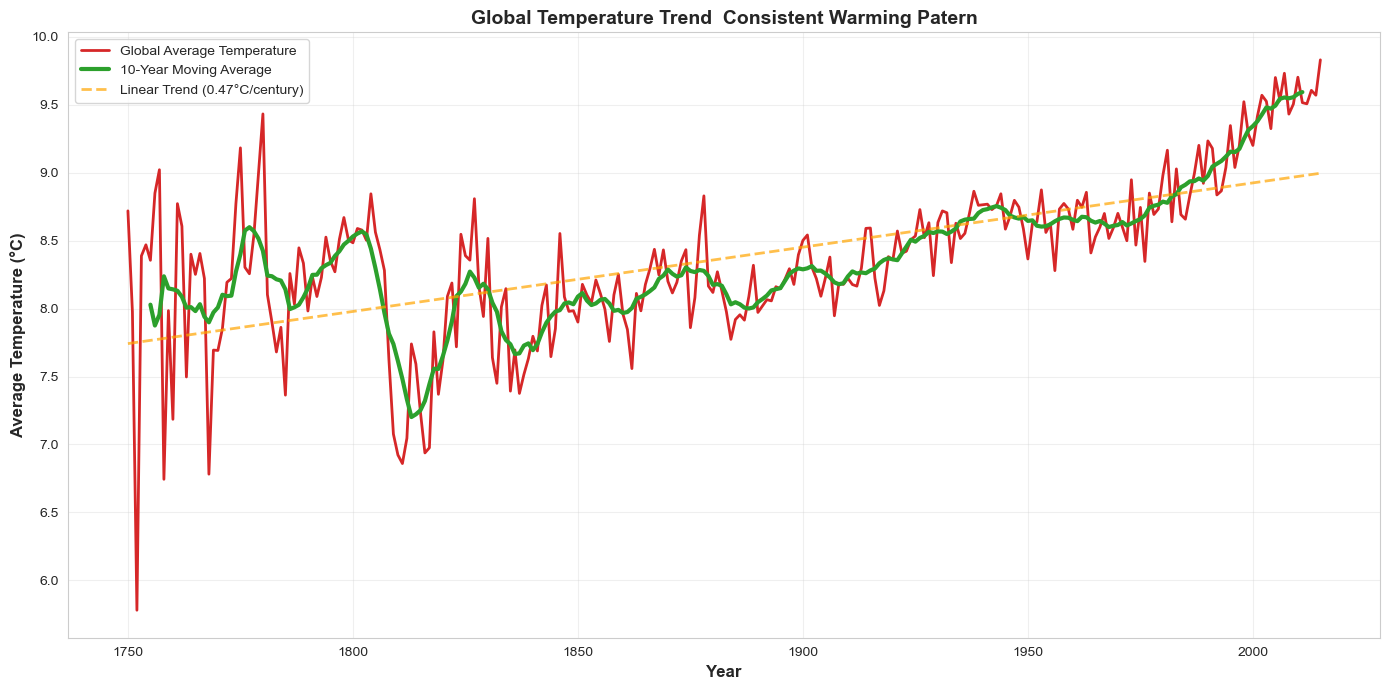

Global warming trend visualization saved as 'global_warming_trend.png'


In [15]:

main_temp_col = 'LandAverageTemperature'

# Check if we have regional data
has_regional_data = False
location_col = None

if 'City' in df.columns:
    location_col = 'City'
    has_regional_data = True
elif 'Country' in df.columns:
    location_col = 'Country'
    has_regional_data = True

if main_temp_col in df.columns and 'Year' in df.columns:
    if has_regional_data and location_col:
        # Ensure Year column exists
        if 'Year' not in df.columns and 'dt' in df.columns:
            df['dt'] = pd.to_datetime(df['dt'])
            df['Year'] = df['dt'].dt.year
        
        min_year = df['Year'].min()
        max_year = df['Year'].max()
        
        # Define periods
        if min_year <= 1850:
            baseline_start = max(1750, min_year)
            baseline_end = min(1850, min_year + 50)
        else:
            baseline_start = min_year
            baseline_end = min_year + 50
        
        recent_start = max_year - 30
        recent_end = max_year
        
        # Calculate regional trends
        baseline_data = df[(df['Year'] >= baseline_start) & (df['Year'] <= baseline_end)]
        baseline_avg = baseline_data.groupby(location_col)[main_temp_col].mean().reset_index()
        baseline_avg.columns = [location_col, 'BaselineTemp']
        
        recent_data = df[(df['Year'] >= recent_start) & (df['Year'] <= recent_end)]
        recent_avg = recent_data.groupby(location_col)[main_temp_col].mean().reset_index()
        recent_avg.columns = [location_col, 'RecentTemp']
        
        regional_trends = pd.merge(baseline_avg, recent_avg, on=location_col, how='inner')
        regional_trends['Warming'] = regional_trends['RecentTemp'] - regional_trends['BaselineTemp']
        regional_trends = regional_trends.sort_values('Warming', ascending=False)
        
        # Create comprehensive visualization
        fig, axes = plt.subplots(2, 2, figsize=(18, 14))
        
        # 1. Top 20 Regions with Highest Warming
        ax1 = axes[0, 0]
        top_20 = regional_trends.head(20)
        colors = plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(top_20)))
        bars = ax1.barh(range(len(top_20)), top_20['Warming'], color=colors, alpha=0.7, edgecolor='black')
        ax1.set_yticks(range(len(top_20)))
        ax1.set_yticklabels(top_20[location_col], fontsize=9)
        ax1.set_xlabel('Temperature Increase (°C)', fontweight='bold')
        ax1.set_title('Top 20 Regions with Highest Warming', fontweight='bold', fontsize=12)
        ax1.grid(True, alpha=0.3, axis='x')
        # Add value labels
        for i, (idx, row) in enumerate(top_20.iterrows()):
            ax1.text(row['Warming'], i, f" {row['Warming']:.2f}°C", 
                    va='center', fontsize=8, fontweight='bold')
        
        # 2. Warming Distribution Histogram
        ax2 = axes[0, 1]
        ax2.hist(regional_trends['Warming'], bins=30, color='coral', alpha=0.7, edgecolor='black')
        ax2.axvline(regional_trends['Warming'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {regional_trends["Warming"].mean():.2f}°C')
        ax2.axvline(0, color='black', linestyle='-', linewidth=1)
        ax2.set_xlabel('Temperature Change (°C)', fontweight='bold')
        ax2.set_ylabel('Number of Regions', fontweight='bold')
        ax2.set_title('Distribution of Regional Warming', fontweight='bold', fontsize=12)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # 3. Warming vs Baseline Temperature
        ax3 = axes[1, 0]
        scatter = ax3.scatter(regional_trends['BaselineTemp'], regional_trends['Warming'], 
                            c=regional_trends['Warming'], cmap='RdYlBu_r', 
                            s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
        ax3.axhline(y=0, color='black', linestyle='--', linewidth=1)
        ax3.set_xlabel('Baseline Temperature (°C)', fontweight='bold')
        ax3.set_ylabel('Temperature Change (°C)', fontweight='bold')
        ax3.set_title('Warming vs Baseline Temperature', fontweight='bold', fontsize=12)
        ax3.grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=ax3, label='Warming (°C)')
        
        # 4. Regional Warming Comparison (Top and Bottom)
        ax4 = axes[1, 1]
        top_10 = regional_trends.head(10)
        bottom_10 = regional_trends.tail(10)
        comparison_df = pd.concat([top_10, bottom_10])
        comparison_df = comparison_df.sort_values('Warming')
        
        colors_comp = ['#d62728' if x > 0 else '#1f77b4' for x in comparison_df['Warming']]
        bars = ax4.barh(range(len(comparison_df)), comparison_df['Warming'], 
                       color=colors_comp, alpha=0.7, edgecolor='black')
        ax4.set_yticks(range(len(comparison_df)))
        ax4.set_yticklabels(comparison_df[location_col], fontsize=8)
        ax4.axvline(x=0, color='black', linestyle='-', linewidth=1)
        ax4.set_xlabel('Temperature Change (°C)', fontweight='bold')
        ax4.set_title('Top 10 Warming vs Bottom 10 Regions', fontweight='bold', fontsize=12)
        ax4.grid(True, alpha=0.3, axis='x')
        # Add value labels
        for i, (idx, row) in enumerate(comparison_df.iterrows()):
            ax4.text(row['Warming'], i, f" {row['Warming']:.2f}°C", 
                    va='center', fontsize=7, fontweight='bold')
        
        plt.suptitle('Regional Warming Trends Analysis', 
                    fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.savefig('regional_warming_trends.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("Visualization saved as 'regional_warming_trends.png'")
        
        # Additional visualization: Time series for top warming regions
        if len(regional_trends) > 0:
            fig2, ax = plt.subplots(figsize=(16, 8))
            top_5_regions = regional_trends.head(5)[location_col].tolist()
            
            for region in top_5_regions:
                region_data = df[df[location_col] == region].copy()
                if len(region_data) > 0:
                    yearly_avg = region_data.groupby('Year')[main_temp_col].mean().reset_index()
                    ax.plot(yearly_avg['Year'], yearly_avg[main_temp_col], 
                           linewidth=2, marker='o', markersize=4, label=region, alpha=0.8)
            
            ax.set_xlabel('Year', fontweight='bold', fontsize=12)
            ax.set_ylabel('Average Temperature (°C)', fontweight='bold', fontsize=12)
            ax.set_title('Temperature Trends: Top 5 Regions with Highest Warming', 
                        fontweight='bold', fontsize=14)
            ax.legend(loc='best', fontsize=10)
            ax.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.savefig('top_regions_warming_timeseries.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            print("Additional visualization saved as 'top_regions_warming_tmeseries.png'")
    
    else:
        # Global visualization
        if 'Year' not in df.columns and 'dt' in df.columns:
            df['dt'] = pd.to_datetime(df['dt'])
            df['Year'] = df['dt'].dt.year
        
        yearly_avg = df.groupby('Year')[main_temp_col].mean().reset_index()
        
        fig, ax = plt.subplots(figsize=(14, 7))
        ax.plot(yearly_avg['Year'], yearly_avg[main_temp_col], 
               linewidth=2, color='#d62728', label='Global Average Temperature')
        
        # Add moving average
        window = 10
        if len(yearly_avg) >= window:
            yearly_avg['MovingAvg'] = yearly_avg[main_temp_col].rolling(window=window, center=True).mean()
            ax.plot(yearly_avg['Year'], yearly_avg['MovingAvg'], 
                   linewidth=3, color='#2ca02c', label=f'{window}-Year Moving Average')
        
        # Add trend line
        from scipy import stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            yearly_avg['Year'], yearly_avg[main_temp_col]
        )
        trend_line = intercept + slope * yearly_avg['Year']
        ax.plot(yearly_avg['Year'], trend_line, '--', color='orange', 
               linewidth=2, label=f'Linear Trend ({slope*100:.2f}°C/century)', alpha=0.7)
        
        ax.set_xlabel('Year', fontweight='bold', fontsize=12)
        ax.set_ylabel('Average Temperature (°C)', fontweight='bold', fontsize=12)
        ax.set_title('Global Temperature Trend  Consistent Warming Patern', 
                    fontweight='bold', fontsize=14)
        ax.legend(loc='best', fontsize=10)
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('global_warming_trend.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("Global warming trend visualization saved as 'global_warming_trend.png'")
else:
    print("Required columns not found for visualization")
